In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import nltk
from nltk.corpus import stopwords
import string
import plotly.express as px
import re
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from swiftascmaps import red
from numpy import random

# Debut 🩵🤍💙

In [2]:
df = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/01-taylor_swift.csv')
df.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


In [3]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Blues',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,album_name,object,0,0.000000
1,track_title,object,0,0.000000
2,track_n,int64,0,0.000000
3,lyric,object,0,0.000000
4,line,int64,0,0.000000


In [4]:
df.columns

Index(['album_name', 'track_title', 'track_n', 'lyric', 'line'], dtype='object')

In [5]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

album_name: 1 distinct values
track_title: 15 distinct values
track_n: 15 distinct values
lyric: 402 distinct values
line: 55 distinct values


In [6]:
df['track_title'].value_counts()

Tim McGraw                              55
Stay Beautiful                          55
Our Song                                51
Picture To Burn                         50
Invisible                               48
Should've Said No                       44
Teardrops on My Guitar (Pop Version)    44
I’m Only Me When I’m with You           43
Tied Together With A Smile              38
Mary’s Song (Oh My My My)               38
Teardrops On My Guitar                  35
The Outside                             35
A Place In This World                   27
A Perfectly Good Heart                  24
Cold As You                             22
Name: track_title, dtype: int64

In [7]:
analyzer = SentimentIntensityAnalyzer()
df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df['Sentiment'] = df['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['lyric', 'Vader_Score', 'Sentiment']].head())

                                         lyric  Vader_Score Sentiment
0          He said the way my blue eyes shined       0.0000   neutral
1  Put those Georgia stars to shame that night      -0.4767  negative
2                       I said, "That's a lie"       0.0000   neutral
3                  Just a boy in a Chevy truck       0.0000   neutral
4         That had a tendency of gettin' stuck      -0.2500  negative


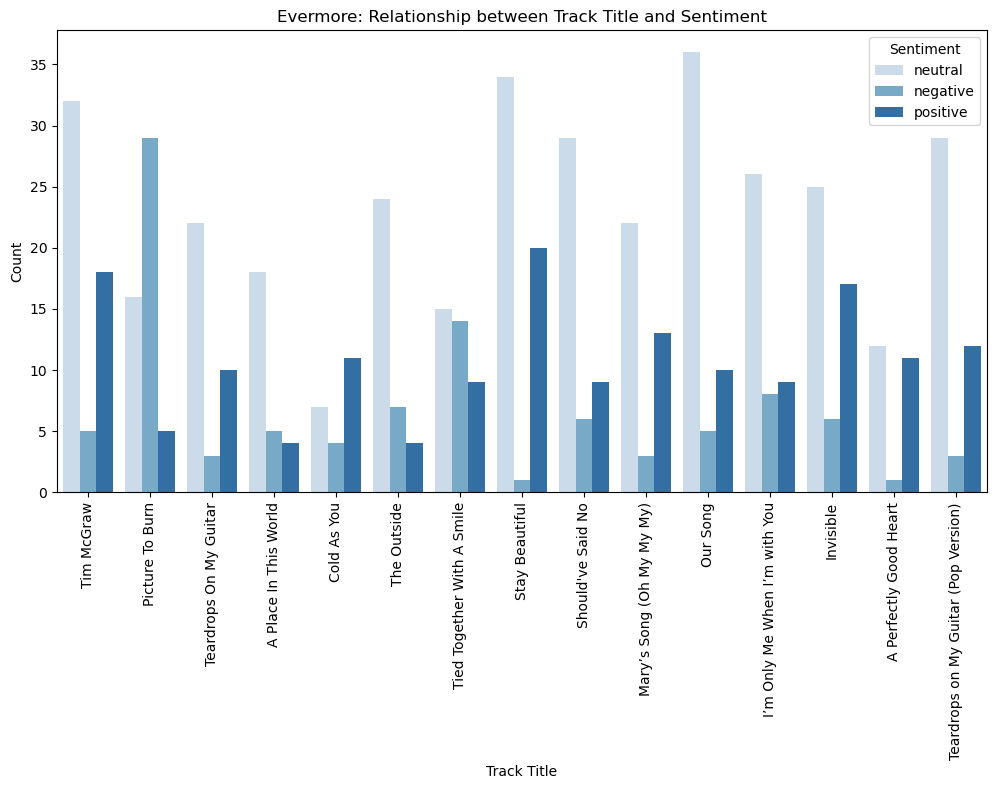

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df, palette='Blues')
plt.title('Evermore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [9]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\s+', ' ', text.strip()) #r 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^\x00-\x7F]+', '', text)  #text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["clean_lyrics"] = df["lyric"].apply(clean)

In [10]:
df['temp_list'] = df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,common_words,count
0,im,43
1,know,42
2,oh,38
3,your,38
4,na,38
5,dont,33
6,think,31
7,he,27
8,back,26
9,never,26


In [11]:
top = Counter([item for sublist in df[df['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['positive_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,positive_words,count
0,beauti,20
1,love,18
2,like,15
3,hope,14
4,think,12
5,wish,11
6,smile,11
7,would,11
8,wan,11
9,na,11


In [12]:
top = Counter([item for sublist in df[df['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['negative_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')

,negative_words,count
0,know,10
1,your,9
2,time,9
3,cri,7
4,im,6
5,realli,6
6,see,6
7,alon,6
8,dont,6
9,one,6


# Fearless 🧡🤎💛

In [13]:
df1 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/02-fearless_taylors_version.csv')
df1['track_title'].value_counts()

Jump Then Fall (Taylor’s Version)                         58
Today Was a Fairytale (Taylor’s Version)                  58
Forever & Always (Piano Version) [Taylor’s Version]       58
Mr. Perfectly Fine (Taylor’s Version) [From the Vault]    57
Hey Stephen (Taylor’s Version)                            54
Forever & Always (Taylor’s Version)                       53
The Way I Loved You (Taylor’s Version)                    50
Fifteen (Taylor’s Version)                                50
You Belong With Me (Taylor’s Version)                     49
Love Story (Taylor’s Version)                             48
That’s When (Taylor’s Version) [From the Vault]           48
The Other Side of the Door (Taylor’s Version)             47
Tell Me Why (Taylor’s Version)                            46
Untouchable (Taylor’s Version)                            45
Bye Bye Baby (Taylor’s Version) [From the Vault]          45
You’re Not Sorry (Taylor’s Version)                       44
White Horse (Taylor’s Ve

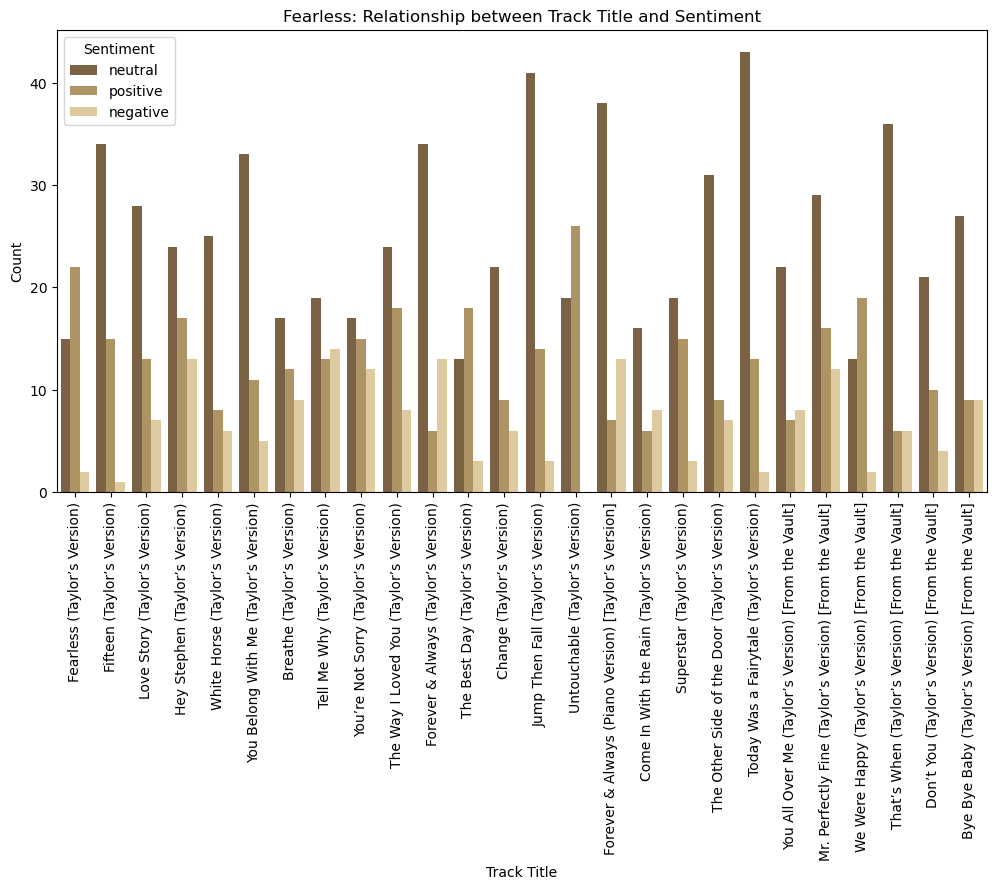

In [14]:
analyzer = SentimentIntensityAnalyzer()
df1['Vader_Score'] = df1['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df1, palette='swift.fearless_tv')
plt.title('Fearless: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Speak Now 💜

In [15]:
df2 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/03-speak_now_deluxe_package.csv')
df2['track_title'].value_counts()

Enchanted              82
Speak Now              71
Long Live              63
Better Than Revenge    59
Last Kiss              59
The Story of Us        58
Mean                   56
Superman               55
Dear John              53
Never Grow Up          52
Haunted                51
Back to December       50
If This Was a Movie    50
Mine                   50
Sparks Fly             49
Innocent               46
Ours                   41
Name: track_title, dtype: int64

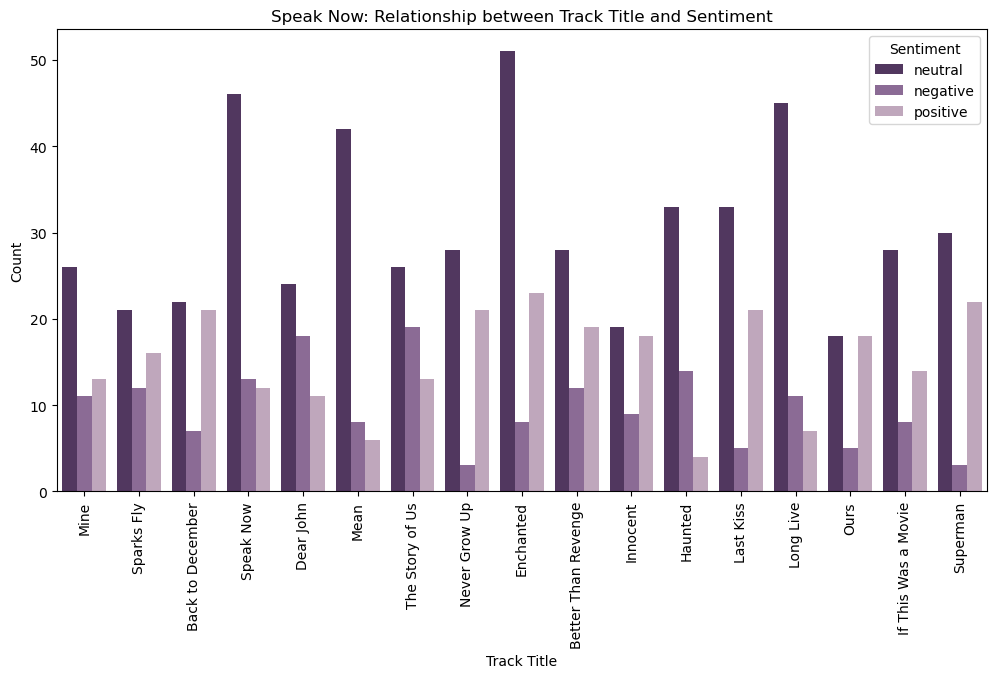

In [16]:
analyzer = SentimentIntensityAnalyzer()
df2['Vader_Score'] = df2['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df2['Sentiment'] = df2['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df2, palette='swift.speak_now_tv')
plt.title('Speak Now: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# RED ❤️

In [17]:
df3 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/04-red_deluxe_edition.csv')
df3['track_title'].value_counts()

Everything Has Changed                     65
22                                         63
The Moment I Knew                          62
I Knew You Were Trouble                    61
The Last Time                              58
All Too Well                               58
Girl at Home                               56
Red                                        55
We Are Never Ever Getting Back Together    53
Treacherous (Original Demo Recording)      51
Starlight                                  48
State of Grace                             48
Treacherous                                47
Come Back... Be Here                       46
Holy Ground                                45
Red (Original Demo Recording)              42
Stay Stay Stay                             41
The Lucky One                              39
State of Grace (Acoustic Version)          36
I Almost Do                                36
Begin Again                                35
Sad Beautiful Tragic              

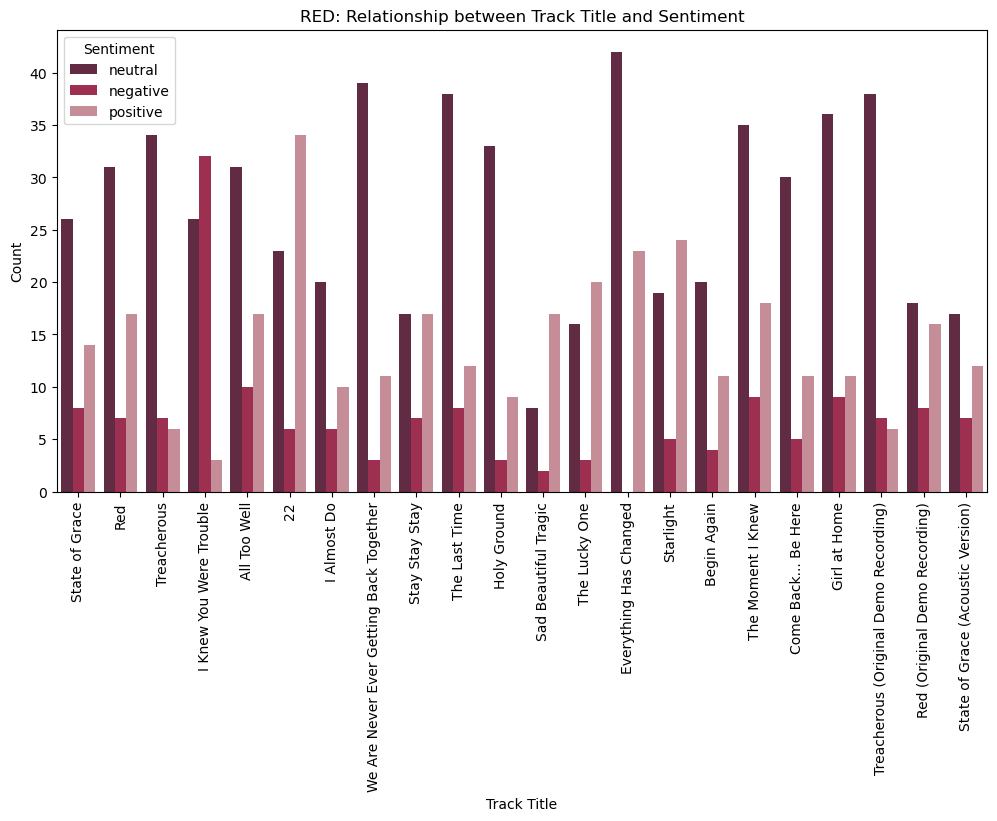

In [18]:
analyzer = SentimentIntensityAnalyzer()
df3['Vader_Score'] = df3['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df3['Sentiment'] = df3['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df3, palette='swift.red')
plt.title('RED: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

df3["clean_lyrics"] = df3["lyric"].apply(clean)

In [20]:
df3['temp_list'] = df3['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df3['temp_list'] for item in sublist])
top_words_df3 = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])
top_words_df3.style.background_gradient(cmap='swift.red')

,common_words,count
0,know,114
1,like,109
2,never,76
3,time,73
4,im,68
5,red,60
6,love,55
7,oh,48
8,dont,47
9,back,43


# 1989 💜🤎🧡

In [21]:
df4 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/05-1989_deluxe.csv')
df4['track_title'].value_counts()

Blank Space                   85
Wonderland                    79
Shake It Off                  77
I Wish You Would              77
Out of the Woods              71
Bad Blood                     70
New Romantics                 69
All You Had to Do Was Stay    67
Wildest Dreams                64
How You Get the Girl          60
You Are in Love               53
Clean                         52
This Love                     51
Style                         48
Welcome to New York           44
I Know Places                 39
Name: track_title, dtype: int64

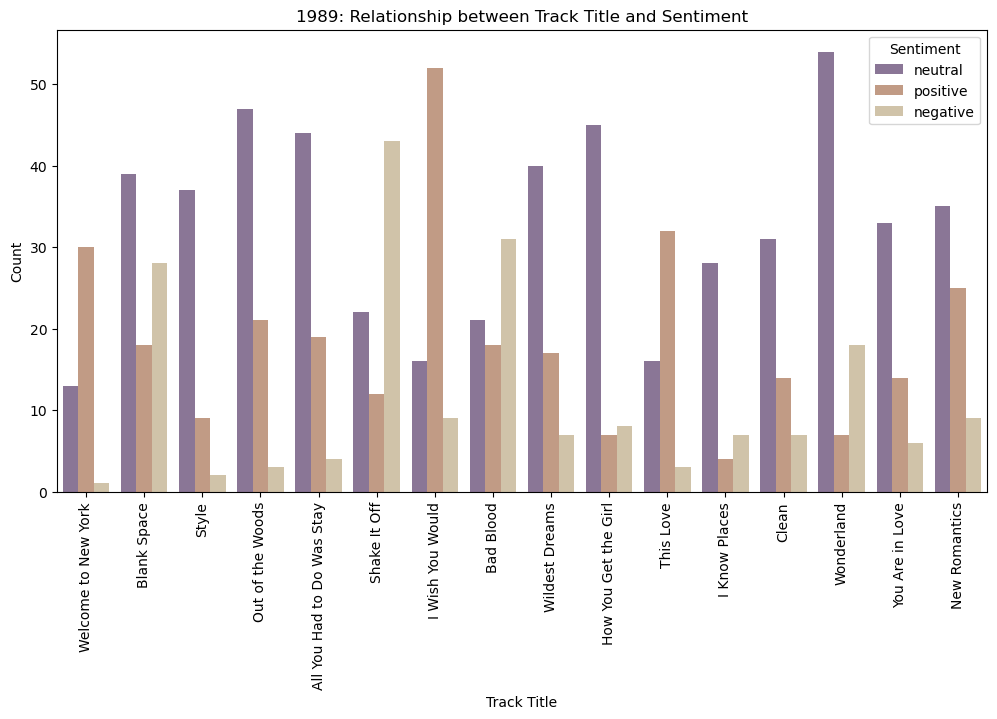

In [22]:
analyzer = SentimentIntensityAnalyzer()
df4['Vader_Score'] = df4['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df4['Sentiment'] = df4['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df4, palette='swift.nineteen_eighty_nine')
plt.title('1989: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Reputation 🖤🤍🩶

In [23]:
df5 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/06-reputation.csv')
df5['track_title'].value_counts()

End Game                                 80
Delicate                                 80
Getaway Car                              75
Call It What You Want                    74
Look What You Made Me Do                 73
So It Goes...                            70
Dress                                    69
I Did Something Bad                      67
Dancing with Our Hands Tied              66
Don’t Blame Me                           63
...Ready for It?                         60
King of My Heart                         59
Gorgeous                                 56
This Is Why We Can’t Have Nice Things    52
New Year’s Day                           44
Name: track_title, dtype: int64

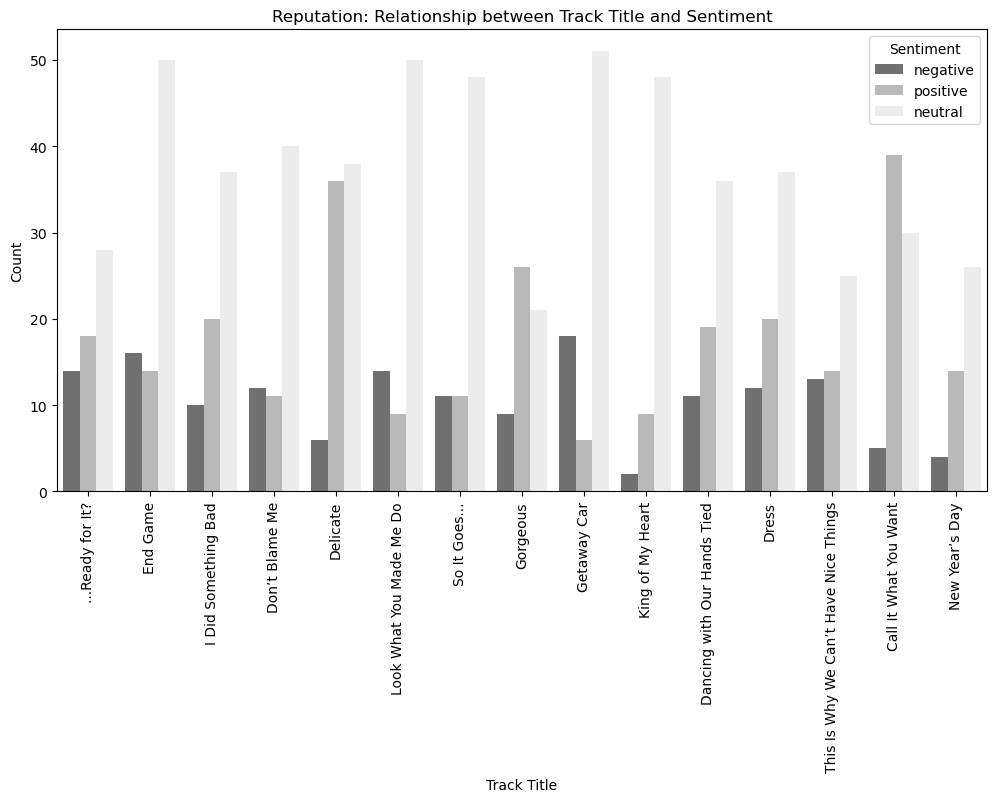

In [24]:
analyzer = SentimentIntensityAnalyzer()
df5['Vader_Score'] = df5['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df5['Sentiment'] = df5['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df5, palette='swift.reputation')
plt.title('Reputation: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Lover 🩷🤍💜

In [25]:
df6 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/07-lover.csv')
df6['track_title'].value_counts()

I Think He Knows                          66
Paper Rings                               65
ME!                                       64
Cruel Summer                              63
Miss Americana & The Heartbreak Prince    62
Death by a Thousand Cuts                  60
Daylight                                  59
London Boy                                58
Cornelia Street                           53
False God                                 50
The Man                                   48
Afterglow                                 48
Soon You’ll Get Better                    46
The Archer                                45
I Forgot That You Existed                 45
You Need To Calm Down                     40
Lover                                     33
It’s Nice to Have a Friend                29
Name: track_title, dtype: int64

In [26]:
df6[df6['track_title'] == 'I Think He Knows']

,album_name,track_title,track_n,lyric,line
234,Lover,I Think He Knows,6,I think he knows,1
235,Lover,I Think He Knows,6,His footprints on the sidewalk,2
236,Lover,I Think He Knows,6,Lead to where I can't stop,3
237,Lover,I Think He Knows,6,Go there every night,4
238,Lover,I Think He Knows,6,I think he knows,5
...,...,...,...,...,...
295,Lover,I Think He Knows,6,"I want you, bless my soul (He got my heartbeat)",62
296,Lover,I Think He Knows,6,"I want you, bless my (Skipping down 16th Avenu...",63
297,Lover,I Think He Knows,6,"I want you, bless my",64
298,Lover,I Think He Knows,6,"I want you, bless my soul",65


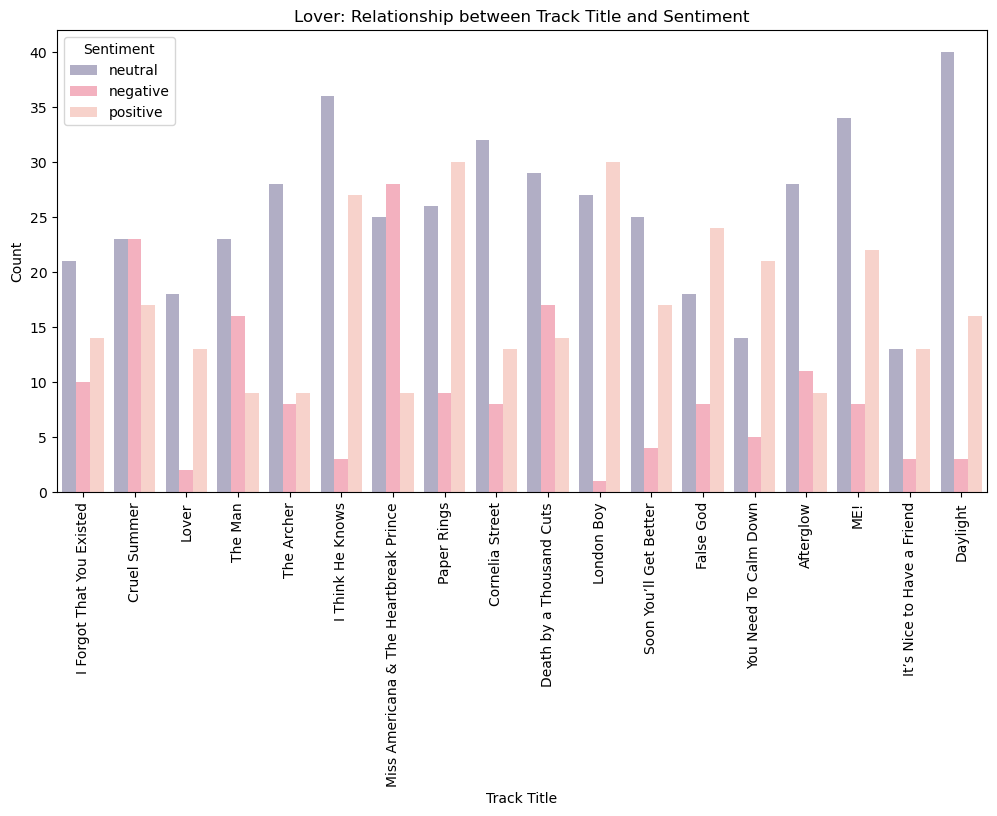

In [27]:
analyzer = SentimentIntensityAnalyzer()
df6['Vader_Score'] = df6['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df6['Sentiment'] = df6['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df6, palette='swift.lover')
plt.title('Lover: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [28]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df6["clean_lyrics"] = df6["lyric"].apply(clean)

In [29]:
df6['temp_list'] = df6['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df6['temp_list'] for item in sublist])
top_words_df6 = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])
top_words_df6.style.background_gradient(cmap='swift.lover')

,common_words,count
0,like,74
1,im,59
2,na,57
3,want,52
4,know,50
5,love,45
6,your,45
7,see,44
8,never,43
9,wan,42


In [30]:
top = Counter([item for sublist in df6[df6['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['positive_common_words', 'count'])
temp_positive.style.background_gradient(cmap='swift.lover')

,positive_common_words,count
0,like,52
1,want,42
2,love,42
3,your,27
4,yeah,19
5,one,18
6,na,17
7,darl,15
8,bless,15
9,ohoh,15


In [31]:
top = Counter([item for sublist in df6[df6['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['negative_common_words', 'count'])
temp_positive.style.background_gradient(cmap='swift.lover')

,negative_common_words,count
0,im,28
1,bad,16
2,get,12
3,like,11
4,hate,10
5,cut,10
6,dont,10
7,want,9
8,okay,9
9,sick,8


# Folklore 🩶💚🖤

In [32]:
df7 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/08-folklore_deluxe_version.csv')
df7['track_title'].value_counts()

​betty                              67
​exile                              61
cardigan                            56
​invisible string                   54
august                              51
the 1                               47
​mad woman                          45
​the last great american dynasty    40
​mirrorball                         39
hoax                                38
my tears ricochet                   37
seven                               37
​illicit affairs                    36
​peace                              33
this is me trying                   29
​the lakes                          28
​epiphany                           24
Name: track_title, dtype: int64

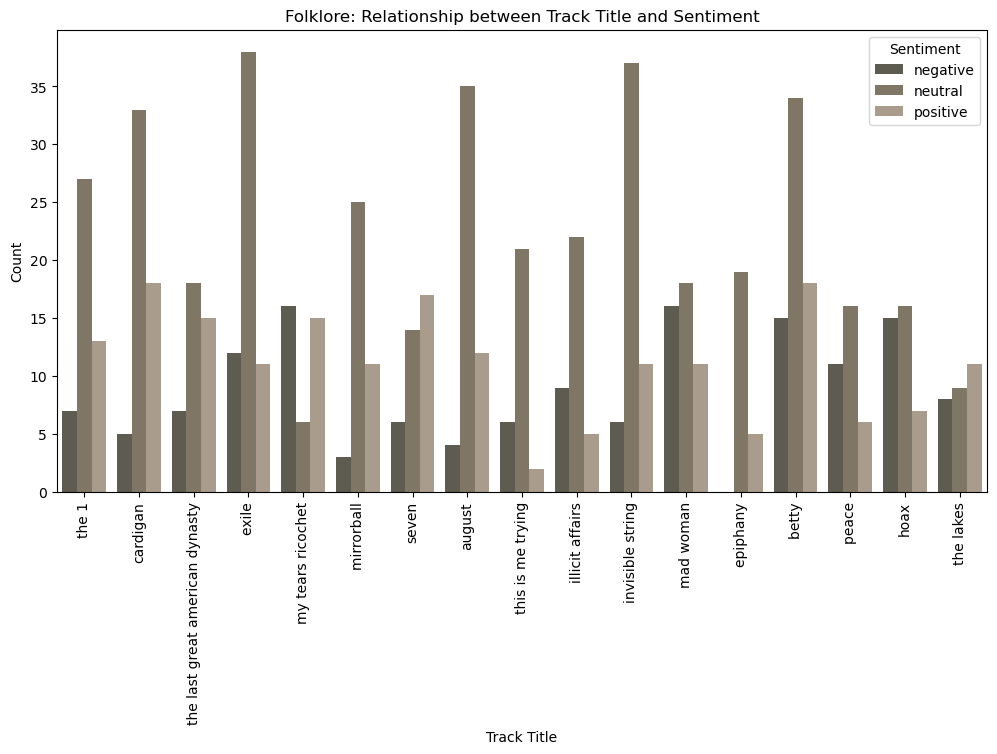

In [33]:
analyzer = SentimentIntensityAnalyzer()
df7['Vader_Score'] = df7['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df7['Sentiment'] = df7['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df7, palette='swift.folklore')
plt.title('Folklore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Evermore 🤎🧡🖤

In [34]:
df8 = pd.read_csv('/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset/09-evermore_deluxe_version.csv')
df8['track_title'].value_counts()
df8.head()

,album_name,track_title,track_n,lyric,line
0,evermore (deluxe version),willow,1,I'm like the water when your ship rolled in th...,1
1,evermore (deluxe version),willow,1,"Rough on the surface, but you cut through like...",2
2,evermore (deluxe version),willow,1,And if it was an open-shut case,3
3,evermore (deluxe version),willow,1,I never would've known from that look on your ...,4
4,evermore (deluxe version),willow,1,Lost in your current like a priceless wine,5


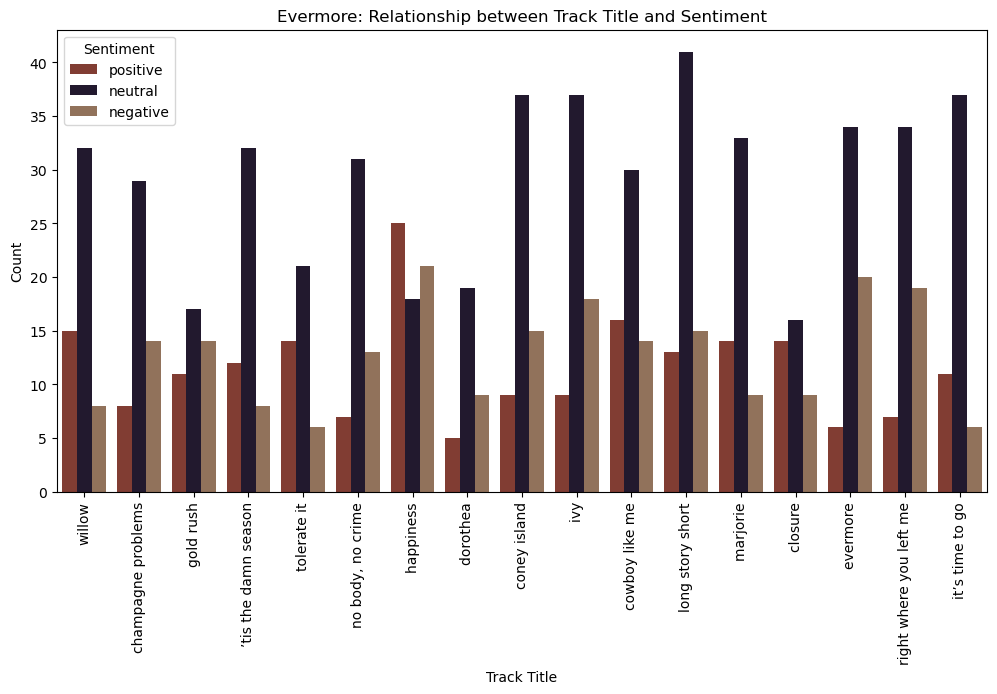

In [35]:
analyzer = SentimentIntensityAnalyzer()
df8['Vader_Score'] = df8['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df8['Sentiment'] = df8['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

plt.figure(figsize=(12, 6))
sns.countplot(x='track_title', hue='Sentiment', data=df8, palette='swift.evermore')
plt.title('Evermore: Relationship between Track Title and Sentiment')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Masters Analysis

In [36]:
import glob  

data_dir = "/Users/kaylaanderson/record-sentiment-analysis/taylor_swift_lyrics_dataset"
analyzer = SentimentIntensityAnalyzer()
all_albums_data = {}

for filepath in glob.glob(f"{data_dir}/*.csv"):
  album_name = filepath.split("/")[-1]  
  df = pd.read_csv(filepath)

  df['Vader_Score'] = df['lyric'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
  df['Sentiment'] = df['Vader_Score'].apply(lambda score:'positive' if score >= 0.05 else
                                           ('negative' if score <= -0.05 else 'neutral'))
  all_albums_data[album_name] = df


In [37]:
all_albums_df = pd.concat(all_albums_data.values(), ignore_index=True)
all_albums_df.head()

,album_name,track_title,track_n,lyric,line,Vader_Score,Sentiment
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,0.000,neutral
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,0.000,neutral
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,0.000,neutral
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,0.000,neutral
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,0.296,positive


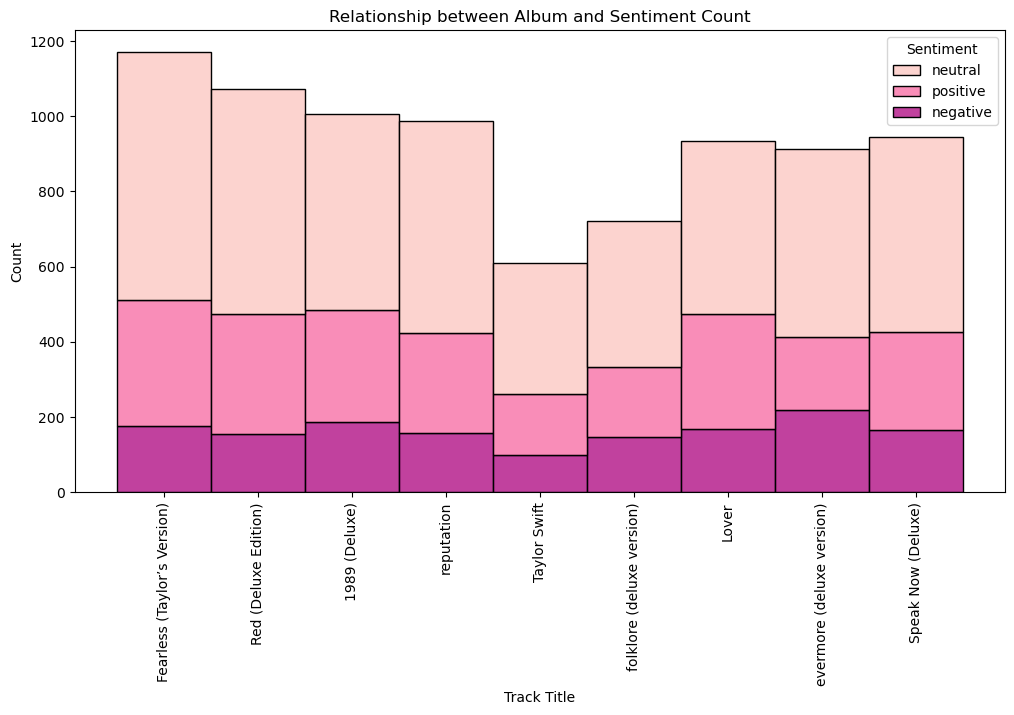

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(x='album_name', hue='Sentiment', data=all_albums_df, palette="RdPu", multiple='stack')
plt.title('Relationship between Album and Sentiment Count')
plt.xlabel('Track Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

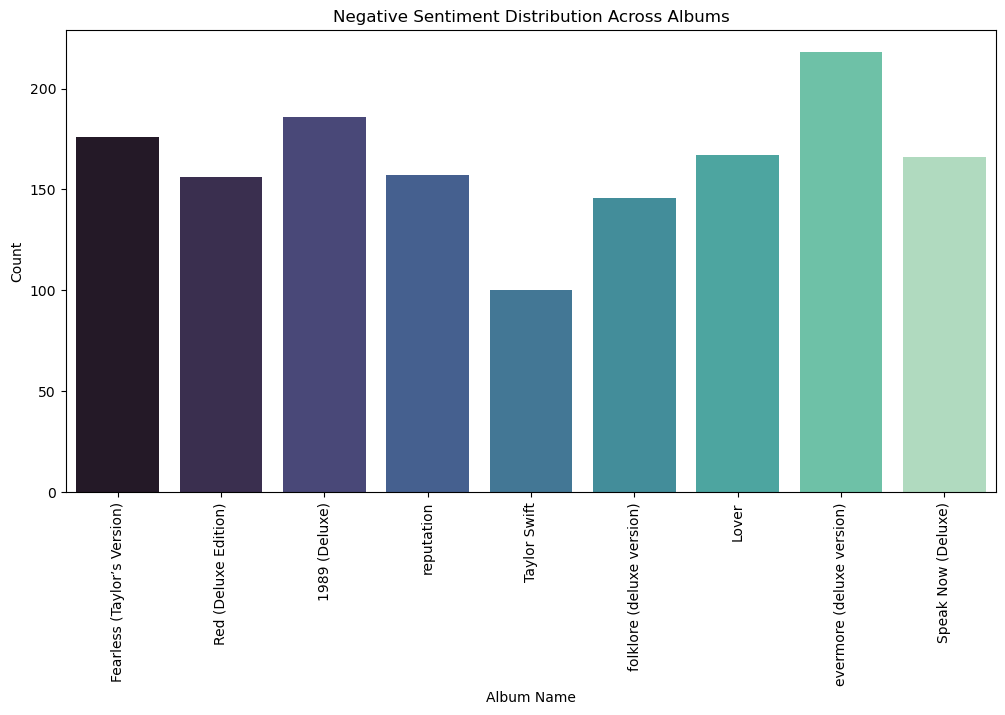

In [39]:
negative_df = all_albums_df[all_albums_df['Sentiment'] == 'negative']

plt.figure(figsize=(12, 6))
sns.countplot(x='album_name', data=negative_df, palette="mako")
plt.title('Negative Sentiment Distribution Across Albums')  # Update title
plt.xlabel('Album Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

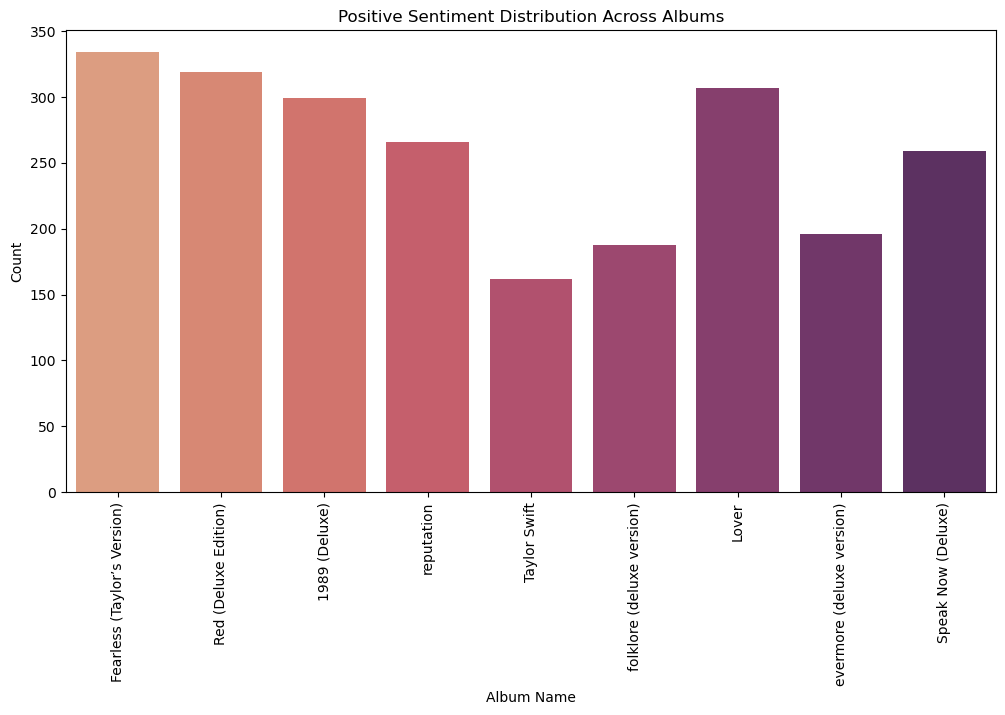

In [40]:
positive_df = all_albums_df[all_albums_df['Sentiment'] == 'positive']

plt.figure(figsize=(12, 6))
sns.countplot(x='album_name', data=positive_df, palette="flare")
plt.title('Positive Sentiment Distribution Across Albums') 
plt.xlabel('Album Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [41]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\s+', ' ', text.strip()) #r 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[^\x00-\x7F]+', '', text)  #text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

all_albums_df["clean_lyrics"] = all_albums_df["lyric"].apply(clean)

In [42]:
all_albums_df['temp_list'] = all_albums_df['clean_lyrics'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in all_albums_df['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['common_words', 'count'])

top_words_df.style.background_gradient(cmap='spring')

,common_words,count
0,know,510
1,im,501
2,like,499
3,oh,411
4,dont,406
5,love,358
6,never,353
7,your,343
8,time,291
9,na,276


# Data Preparation

In [43]:
prep_df = all_albums_df.copy()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [45]:
X = prep_df['clean_lyrics'].values
y = prep_df['Sentiment'].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model

In [47]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Passive Agressive Classifier

In [48]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [49]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [50]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.8911483253588517
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.72      0.78       290
     neutral       0.91      0.95      0.93       915
    positive       0.87      0.88      0.87       467

    accuracy                           0.89      1672
   macro avg       0.88      0.85      0.86      1672
weighted avg       0.89      0.89      0.89      1672



Logistic Classifier

In [51]:
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [53]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.8391148325358851
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.54      0.66       290
     neutral       0.83      0.97      0.89       915
    positive       0.86      0.78      0.81       467

    accuracy                           0.84      1672
   macro avg       0.85      0.76      0.79      1672
weighted avg       0.84      0.84      0.83      1672



Random Forest Classifier

In [54]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [56]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.9210526315789473
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.75      0.82       290
     neutral       0.93      0.98      0.96       915
    positive       0.91      0.91      0.91       467

    accuracy                           0.92      1672
   macro avg       0.91      0.88      0.89      1672
weighted avg       0.92      0.92      0.92      1672



SVM Classifier

In [80]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [81]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [82]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.9007177033492823
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.72      0.80       290
     neutral       0.89      0.98      0.93       915
    positive       0.93      0.85      0.89       467

    accuracy                           0.90      1672
   macro avg       0.90      0.85      0.87      1672
weighted avg       0.90      0.90      0.90      1672



Multinomial NB

In [60]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [61]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [62]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.7978468899521531
Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.39      0.53       290
     neutral       0.78      0.97      0.87       915
    positive       0.82      0.72      0.77       467

    accuracy                           0.80      1672
   macro avg       0.82      0.69      0.72      1672
weighted avg       0.81      0.80      0.78      1672



<b>Most Accurate Modeling: Random Forest Classifier</b>

Hyperparameters

In [63]:
rfc = RandomForestClassifier(random_state=42)
params = rfc.get_params()

print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [64]:
param_dist = {
  'n_estimators': [50, 100, 150],
  'max_depth': [25, 50, 100],
  'criterion': ['gini', 'entropy']
}

In [65]:
randomized_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [25, 50, 100],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='accuracy')

In [66]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'n_estimators': 150, 'max_depth': 100, 'criterion': 'gini'}

In [67]:
best_rfc_classifier_randomized = RandomForestClassifier(random_state=42, **best_params_randomized)
best_rfc_classifier_randomized.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=100, n_estimators=150, random_state=42)

In [68]:
y_pred_best_rfc_randomized = best_rfc_classifier_randomized.predict(X_test_tfidf)

In [69]:
accuracy_best_rfc_randomized = accuracy_score(y_test, y_pred_best_rfc_randomized)
classification_rep_best_rfc_randomized = classification_report(y_test, y_pred_best_rfc_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_rfc_randomized)

In [70]:
print("Best RandomForestClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_rfc_randomized}")
print("Classification Report:\n", classification_rep_best_rfc_randomized)

Best RandomForestClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'n_estimators': 150, 'max_depth': 100, 'criterion': 'gini'}
Accuracy: 0.8588516746411483
Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.54      0.69       290
     neutral       0.83      0.99      0.90       915
    positive       0.91      0.81      0.86       467

    accuracy                           0.86      1672
   macro avg       0.89      0.78      0.81      1672
weighted avg       0.87      0.86      0.85      1672



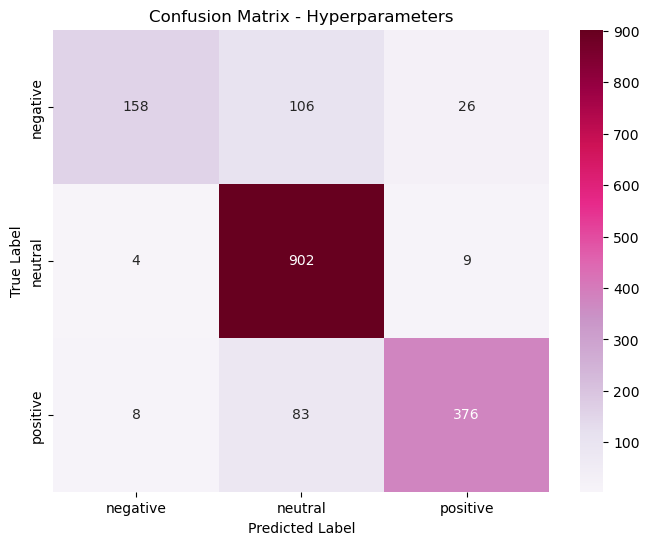

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='PuRd', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- RFR has the ability to produce the most accurate results but is <b>very</b> slow if increasing the max_depth parameter to produce more accurate results

<b>True Best Modeling: Support Vector Machine Classifier</b>

In [72]:
param_dist = {
  'C': [0.1, 1, 10],  
  'kernel': ['linear', 'rbf', 'poly'],  
  'gamma': [0.1, 1, 10],  
}

In [73]:
randomized_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.1, 1, 10],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [74]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'kernel': 'linear', 'gamma': 1, 'C': 10}

In [75]:
best_svm_classifier_randomized = SVC(random_state=42, **best_params_randomized)
best_svm_classifier_randomized.fit(X_train_tfidf, y_train)

SVC(C=10, gamma=1, kernel='linear', random_state=42)

In [76]:
y_pred_best_svm_randomized = best_svm_classifier_randomized.predict(X_test_tfidf)

In [77]:
accuracy_best_svm_randomized = accuracy_score(y_test, y_pred_best_svm_randomized)
classification_rep_best_svm_randomized = classification_report(y_test, y_pred_best_svm_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_svm_randomized)

In [78]:
print("Best SVM Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_svm_randomized}")
print("Classification Report:\n", classification_rep_best_svm_randomized)

Best SVM Model (RandomizedSearchCV):
Best Hyperparameters: {'kernel': 'linear', 'gamma': 1, 'C': 10}
Accuracy: 0.8977272727272727
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.78      0.79       290
     neutral       0.94      0.95      0.94       915
    positive       0.87      0.88      0.87       467

    accuracy                           0.90      1672
   macro avg       0.87      0.87      0.87      1672
weighted avg       0.90      0.90      0.90      1672



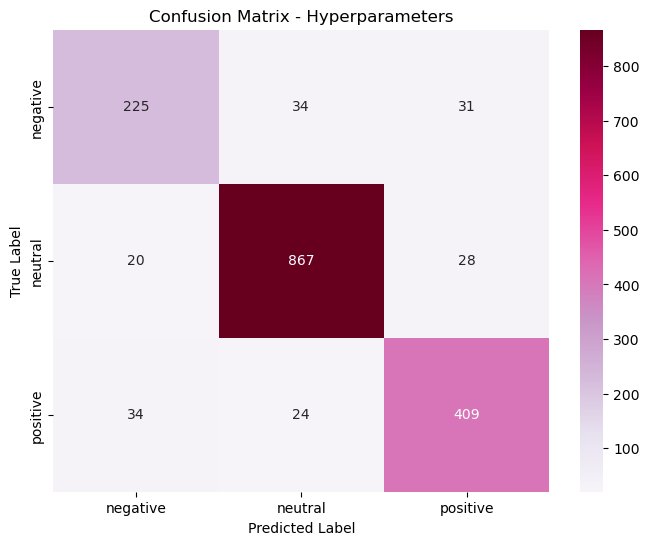

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='PuRd', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()